In [4]:
import pandas as pd



In [6]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()
fitbit_df.head
  

<bound method NDFrame.head of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    3/25/2016       11004       7.110000         7.110000   
1    1503960366    3/26/2016       17609      11.550000        11.550000   
2    1503960366    3/27/2016       12736       8.530000         8.530000   
3    1503960366    3/28/2016       13231       8.930000         8.930000   
4    1503960366    3/29/2016       12041       7.850000         7.850000   
..          ...          ...         ...            ...              ...   
452  8877689391   04/08/2016       23014      20.389999        20.389999   
453  8877689391   04/09/2016       16470       8.070000         8.070000   
454  8877689391   04/10/2016       28497      27.530001        27.530001   
455  8877689391   04/11/2016       10622       8.060000         8.060000   
456  8877689391   04/12/2016        2350       1.780000         1.780000   

     LoggedActivitiesDistance  VeryActiveDistance  Modera

In [8]:
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [10]:
#Print the column names
print(daily_activity_df.columns)
print(fitbit_df .columns)   

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [12]:
#merging the DataFrames
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [14]:
# Print the number of rows in the merged dataset
print("merged_df:", len(merged_df))

merged_df: 1397


In [16]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

duplicate_df.to_csv("duplicates.csv", index=False)
cleaned_data.to_csv("cleaned_data.csv", index=False)

In [18]:
## look at data 
cleaned_data.head()
## export as an excel file 
cleaned_data.to_excel("cleaneddata.xlsx",)

In [20]:
### check cleaned data size
count_rows = len(cleaned_data)
print(count_rows)
## check number of participants 
count_ID = len(pd.unique(cleaned_data['Id']))
print(count_ID)

1397
35


In [22]:
## Extract relevant columns for my tests
activity_levels = cleaned_data[["Id","TotalSteps","VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]]
activity_levels.head()


,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,13162,25,13,328,728
1,1503960366,10735,21,19,217,776
2,1503960366,10460,30,11,181,1218
3,1503960366,9762,29,34,209,726
4,1503960366,12669,36,10,221,773


In [24]:
### Part 1
### HOW MANY REACHED THE GOAL OF 10,000 STEPS, AND WHAT WERE THE AVERAGE STEPS 
goal_reached = activity_levels.loc[activity_levels["TotalSteps"] >= 10000, ["Id", "TotalSteps"]]
goal_reached.head()
count_reached = len(goal_reached)
print(count_reached)
goal_reached


430


,Id,TotalSteps
0,1503960366,13162
1,1503960366,10735
2,1503960366,10460
4,1503960366,12669
6,1503960366,13019
...,...,...
1391,8877689391,10910
1392,8877689391,23014
1393,8877689391,16470
1394,8877689391,28497


In [26]:
## percentage of entrees that met this goal 
##RESULT 1
successful_days = f"{430/1397:.0%}"
print(successful_days)

31%


In [28]:
###number of individuals reaching goal 
no_individuals = len(pd.unique(goal_reached['Id']))
no_individuals 


26

In [30]:
##RESULT 2
###percentage of participants that reached the 10,000 steps goal 
percentage_participants = f"{26/35:0%}"
print(percentage_participants)


74.285714%


In [32]:
##Result 3
##Average steps of users
average_steps = activity_levels['TotalSteps'].mean()
print(average_steps)


7280.898353614889


In [34]:
#### results table 

steps_results = {
    'Percentage of time goal was met': [successful_days],
    'Percentage of participants that reached goal': [percentage_participants],
    'Average steps taken' : [average_steps],
}

steps_results

steps_table = pd.DataFrame(data=steps_results)
steps_table 
##NOTES MAKE TO ONE DECIMAL PLACE 

,Percentage of time goal was met,Percentage of participants that reached goal,Average steps taken
0,31%,74.285714%,7280.898354


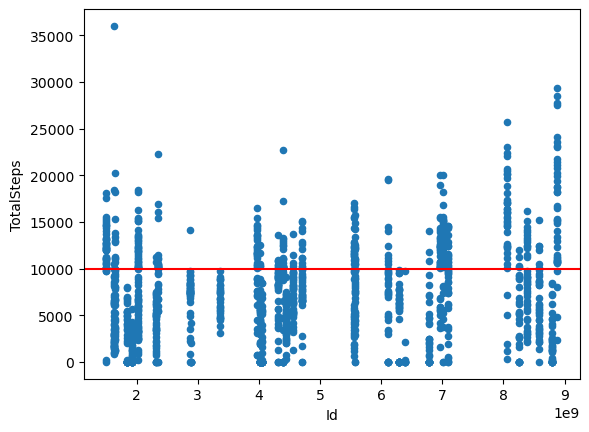

In [47]:
###Part 2 graph building 
import matplotlib.pyplot as plt

activity_levels.plot.scatter(x='Id', y='TotalSteps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')



                                            

In [83]:
##### PART 2 Graphical depiction 
### Average steps per person

#average_steps_df = cleaned_data.groupby('Id').agg({'TotalSteps'



average_steps = cleaned_data.groupby('Id', as_index=False).agg(Average_steps=pd.NamedAgg(column='TotalSteps', aggfunc='mean'))
average_steps.head()
##not sure if you did this right as excel shows different averages, when i did calculations it shows that the total is being divided by 31.5 instead of 31, and 12.7 instead of 12
average_steps

## 


,Id,Average_steps
0,1503960366,11935.780000
1,1624580081,5167.200000
2,1644430081,7780.925000
3,1844505072,2876.023256
4,1927972279,1269.069767
5,2022484408,11595.093023
6,2026352035,4960.139535
7,2320127002,4276.372093
8,2347167796,9647.121212
9,2873212765,7299.255814


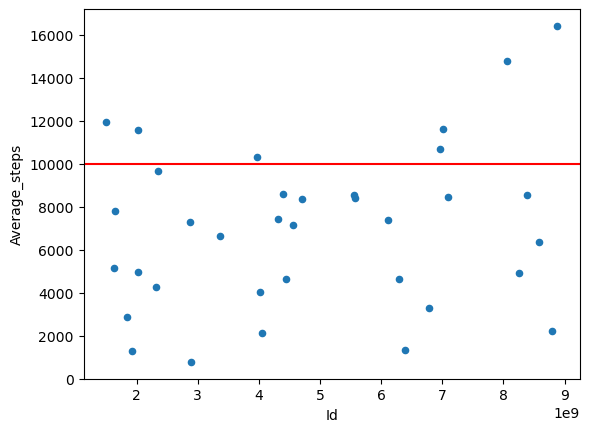

In [79]:


average_steps.plot.scatter(x='Id', y='Average_steps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')



    

In [87]:
###Part 3 statistical testing 
### HYPOTHESIS 
### is there statistical significant difference between people/ entrees  who were moderately to highly active, and those who met there 10,000 steps.

##bringing down previous dataframes for ease
goal_reached
activity_levels


,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,13162,25,13,328,728
1,1503960366,10735,21,19,217,776
2,1503960366,10460,30,11,181,1218
3,1503960366,9762,29,34,209,726
4,1503960366,12669,36,10,221,773
...,...,...,...,...,...,...
1392,8877689391,23014,70,29,359,982
1393,8877689391,16470,90,9,289,1052
1394,8877689391,28497,128,46,211,1055
1395,8877689391,10622,18,7,225,1190


In [ ]:
##fairly_to_very_active = activity_levels.loc